In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns

In [2]:
# find the path on your disk
pathName = r"C:\MyFiles\Dropbox\Teaching\Urban_Data_Analsysis\Spring 2021\Data\BlockGroups.csv"

In [3]:
# read the csv as a dataframe
df = pd.read_csv(pathName)

In [4]:
df.sample(2)

,INTPTLAT,INTPTLON,GISJOIN,YEAR,Median_age,Population,WhiteAlone,BlackAlone,NativeAlone,BlackAlonWithComb,...,pctCommutePTnsitOver60,pctCommuteWalkBike,pct_LivingAlone65Over,pct_LessThanHighSchool,pctMobileHomes,BlcokG_Area_SqMeter,WaterFront,NearParks,NearMajorParks,boro_name
3401,40.660808,-73.915282,G36004700894003,2012-2016,28.4,1559,209,1066,0,1066,...,4.618345,8.082104,0.962155,4.169339,0.0,28559.03274,No,Yes,NO,Brooklyn
3081,40.717599,-73.886838,G36008100665012,2012-2016,40.7,1014,951,0,0,63,...,5.522683,3.155818,3.944773,3.747535,0.0,89978.26195,No,Yes,Yes,Queens


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5852 entries, 0 to 5851
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   INTPTLAT                5852 non-null   float64
 1   INTPTLON                5852 non-null   float64
 2   GISJOIN                 5852 non-null   object 
 3   YEAR                    5852 non-null   object 
 4   Median_age              5852 non-null   float64
 5   Population              5852 non-null   int64  
 6   WhiteAlone              5852 non-null   int64  
 7   BlackAlone              5852 non-null   int64  
 8   NativeAlone             5852 non-null   int64  
 9   BlackAlonWithComb       5852 non-null   int64  
 10  Hisp_Latino             5852 non-null   int64  
 11  MedHouseholdIncome      5852 non-null   int64  
 12  PerCapitaIncome         5852 non-null   int64  
 13  MedYearBuilt            5852 non-null   object 
 14  MedianValue             5852 non-null   

In [6]:
df['MedianValue'] = pd.to_numeric(df['MedianValue'], errors='coerce')
df.replace([np.inf, -np.inf,0], np.nan)
# drop nan values
df.dropna(inplace=True)

# One-way ANOVA
### differences between multiple groups: we need a categorical variable with more than two groups in it in addition to a numerical variable)

In [7]:
# let's see the mean and median of each group
grp = df.groupby('boro_name')
grp['MedianValue'].agg([np.median, np.mean])

,median,mean
boro_name,,
Bronx,405250.0,3.816601e+05
Brooklyn,631400.0,6.811141e+05
Manhattan,916700.0,1.059690e+06
Queens,478300.0,5.054620e+05
Staten Island,446650.0,4.527568e+05


#### let's plot the math score for the groups

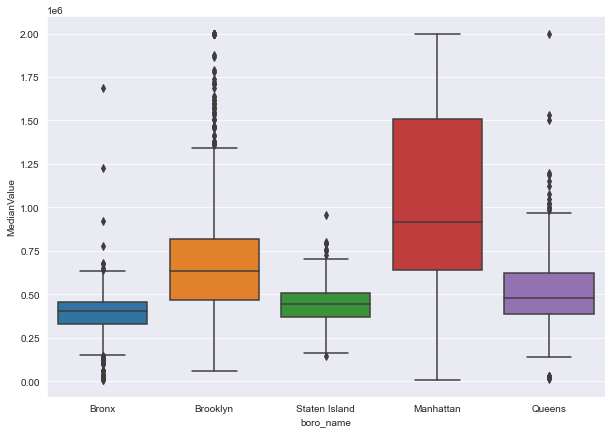

In [9]:
# set the style
# https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set_style("darkgrid")

fig = plt.gcf()
# Changing Seaborn Plot size
fig.set_size_inches(10, 7)

sns.boxplot(data=df, x='boro_name', y='MedianValue');

In [10]:
df.sample(2)

,INTPTLAT,INTPTLON,GISJOIN,YEAR,Median_age,Population,WhiteAlone,BlackAlone,NativeAlone,BlackAlonWithComb,...,pctCommutePTnsitOver60,pctCommuteWalkBike,pct_LivingAlone65Over,pct_LessThanHighSchool,pctMobileHomes,BlcokG_Area_SqMeter,WaterFront,NearParks,NearMajorParks,boro_name
3797,40.671714,-73.951719,G36004700317023,2012-2016,28.0,1108,537,302,0,302,...,8.212996,1.444043,1.895307,3.971119,0.0,46568.82367,No,No,NO,Brooklyn
2693,40.790588,-73.831140,G36008100945001,2012-2016,40.3,2054,1125,41,0,41,...,7.887050,0.681597,2.190847,4.381694,0.0,716838.86450,Yes,Yes,NO,Queens


In [11]:
df['boro_name'].unique()

array(['Bronx', 'Brooklyn', 'Staten Island', 'Manhattan', 'Queens'],
      dtype=object)

In [12]:
# we need to pass the dataframe as the input. notice the syntax for columns
my_model = ols('MedianValue ~ boro_name', data = df).fit()
anova_table = sm.stats.anova_lm(my_model, typ=2)
# print the results
print(anova_table)

                 sum_sq      df           F  PR(>F)
boro_name  1.665867e+14     4.0  497.186626     0.0
Residual   3.641250e+14  4347.0         NaN     NaN


### Calculate effect size

In [13]:
# see this page to learn about https://imaging.mrc-cbu.cam.ac.uk/statswiki/FAQ/effectSize
esq_sm = anova_table['sum_sq'][0]/(anova_table['sum_sq'][0]+anova_table['sum_sq'][1])
print (esq_sm)

0.31389300408349763


## post hoc tests: pair-wise t-tests

In [14]:
import statsmodels.stats.multicomp as mc
comp = mc.MultiComparison(df['MedianValue'],df['boro_name'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()
# reject means that you have to reject the null hypothesis. If the column "reject" is True, then you've found a siginificant relationships between your groups

group1,group2,meandiff,p-adj,lower,upper,reject
Bronx,Brooklyn,299453.9306,0.001,258382.0988,340525.7623,True
Bronx,Manhattan,678029.6579,0.001,628784.9316,727274.3843,True
Bronx,Queens,123801.889,0.001,82425.428,165178.35,True
Bronx,Staten Island,71096.7147,0.0098,11660.5431,130532.8863,True
Brooklyn,Manhattan,378575.7274,0.001,339405.546,417745.9087,True
Brooklyn,Queens,-175652.0416,0.001,-204309.8775,-146994.2057,True
Brooklyn,Staten Island,-228357.2159,0.001,-279756.8124,-176957.6193,True
Manhattan,Queens,-554227.769,0.001,-593717.252,-514738.2859,True
Manhattan,Staten Island,-606932.9432,0.001,-665071.2803,-548794.6062,True
Queens,Staten Island,-52705.1743,0.0428,-104348.5155,-1061.8331,True


C:\Users\Mehdi\.conda\envs\UrbanDataAnalysis\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


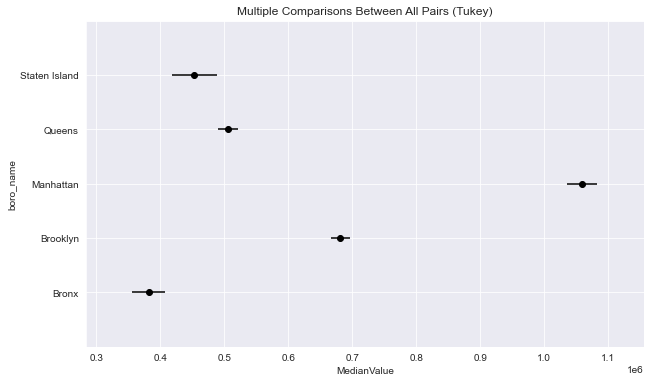

In [15]:
post_hoc_res.plot_simultaneous(ylabel= "boro_name", xlabel= "MedianValue");

### Two-way ANOVA

In [10]:
my_model = ols('MedianValue ~ boro_name', data = df).fit()
anova_table = sm.stats.anova_lm(my_model, typ=2)
# print the results
print(anova_table)

                 sum_sq      df           F  PR(>F)
boro_name  1.665867e+14     4.0  497.186626     0.0
Residual   3.641250e+14  4347.0         NaN     NaN


In [11]:
my_model = ols('MedianValue ~ C(boro_name) + C(NearMajorParks) + C(NearMajorParks):C(boro_name)', data=df).fit()
anova_table = sm.stats.anova_lm(my_model, typ=2)
# print the results
print(anova_table)

                                      sum_sq      df           F    PR(>F)
C(boro_name)                    1.665905e+14     4.0  499.284742  0.000000
C(NearMajorParks)               5.984564e+11     1.0    7.174483  0.007423
C(NearMajorParks):C(boro_name)  1.340475e+12     4.0    4.017507  0.002961
Residual                        3.621861e+14  4342.0         NaN       NaN


### ANOVA table using bioinfokit v2.0.3 or later

In [9]:
# ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df, res_var='MedianValue', anova_model='MedianValue~C(boro_name)+C(NearMajorParks)+C(boro_name):C(NearMajorParks)')
res.anova_summary


,df,sum_sq,mean_sq,F,PR(>F)
C(boro_name),4.0,1.665905e+14,4.164763e+13,499.284742,0.000000
C(NearMajorParks),1.0,5.984564e+11,5.984564e+11,7.174483,0.007423
C(boro_name):C(NearMajorParks),4.0,1.340475e+12,3.351187e+11,4.017507,0.002961
Residual,4342.0,3.621861e+14,8.341458e+10,NaN,NaN


## post hoc tests: pair-wise t-tests for two-way ANOVA

In [17]:
# we will use bioinfokit (v2.0.3 or later) for performing tukey HSD test
# check documentation here https://github.com/reneshbedre/bioinfokit
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
# for main effect boro_name
res.tukey_hsd(df=df, res_var='MedianValue', xfac_var='boro_name', anova_model='MedianValue~C(boro_name)+C(NearMajorParks)+C(boro_name):C(NearMajorParks)')
res.tukey_summary

# Note: p-value 0.001 from tukey_hsd output should be interpreted as <=0.001

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Bronx,Brooklyn,299453.930580,258467.998521,340439.862639,28.196707,0.00100
1,Bronx,Staten Island,71096.714698,11784.850875,130408.578520,4.626059,0.00953
2,Bronx,Manhattan,678029.657943,628887.924441,727171.391445,53.247767,0.00100
3,Bronx,Queens,123801.888985,82511.964763,165091.813207,11.571412,0.00100
4,Brooklyn,Staten Island,228357.215882,177065.119021,279649.312744,17.181753,0.00100
5,Brooklyn,Manhattan,378575.727363,339487.468488,417663.986238,37.377446,0.00100
6,Brooklyn,Queens,175652.041595,147054.142152,204249.941039,23.704033,0.00100
7,Staten Island,Manhattan,606932.943245,548916.199582,664949.686908,40.372956,0.00100
8,Staten Island,Queens,52705.174287,1169.842563,104240.506012,3.946857,0.04212
9,Manhattan,Queens,554227.768958,514820.876193,593634.661723,54.277430,0.00100


In [18]:
# for main effect NearMajorParks
res.tukey_hsd(df=df, res_var='MedianValue', xfac_var='NearMajorParks', anova_model='MedianValue~C(boro_name)+C(NearMajorParks)+C(boro_name):C(NearMajorParks)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,NO,Yes,27215.425343,7231.795172,47199.055514,3.775938,0.007615


In [19]:
# for interaction effect between NearMajorParks and boro_name
res.tukey_hsd(df=df, res_var='MedianValue', xfac_var=['boro_name','NearMajorParks'], anova_model='MedianValue~C(boro_name)+C(NearMajorParks)+C(boro_name):C(NearMajorParks)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(Bronx, NO)","(Bronx, Yes)",4316.475242,-83880.623401,92513.573885,0.219086,0.900000
1,"(Bronx, NO)","(Brooklyn, NO)",299311.203931,242525.826481,356096.581380,23.595343,0.001000
2,"(Bronx, NO)","(Brooklyn, Yes)",291364.820021,214780.760246,367948.879796,17.030938,0.001000
3,"(Bronx, NO)","(Staten Island, NO)",39938.101938,-53755.602570,133631.806446,1.908169,0.900000
4,"(Bronx, NO)","(Staten Island, Yes)",97720.811081,5894.001501,189547.620660,4.763843,0.026388
5,"(Bronx, NO)","(Manhattan, NO)",637390.428424,567185.935932,707594.920916,40.642505,0.001000
6,"(Bronx, NO)","(Manhattan, Yes)",749487.585155,666177.504284,832797.666027,40.272327,0.001000
7,"(Bronx, NO)","(Queens, NO)",117647.536892,60148.032254,175147.041531,9.159222,0.001000
8,"(Bronx, NO)","(Queens, Yes)",140011.101819,67382.281472,212639.922166,8.629653,0.001000
9,"(Bronx, Yes)","(Brooklyn, NO)",303627.679173,227285.010914,379970.347431,17.803847,0.001000
